In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 读取数据
file_path = "C:/Users/31326/Downloads/most_watched_anime_dataset_100_entries.csv"
df = pd.read_csv(file_path)

# 数据清理
df_cleaned = df.copy()

# 处理缺失值
df_cleaned["Ratings"] = df_cleaned["Ratings"].fillna(df_cleaned["Ratings"].median())
df_cleaned["Budget (in Million USD)"] = df_cleaned["Budget (in Million USD)"].fillna(df_cleaned["Budget (in Million USD)"].median())
df_cleaned["Most Watched in Country"] = df_cleaned["Most Watched in Country"].fillna("Unknown")
df_cleaned["Animation Studio Name"] = df_cleaned["Animation Studio Name"].fillna("Unknown")
df_cleaned["Release Year"] = df_cleaned["Release Year"].fillna(df_cleaned["Release Year"].median()).astype(int)

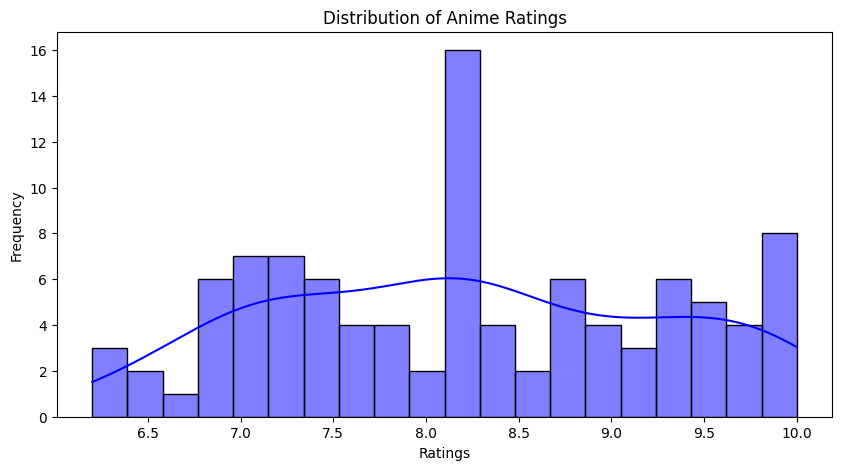

In [7]:
# 1️⃣ 绘制评分分布直方图
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Ratings"], bins=20, kde=True, color="blue")
plt.title("Distribution of Anime Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

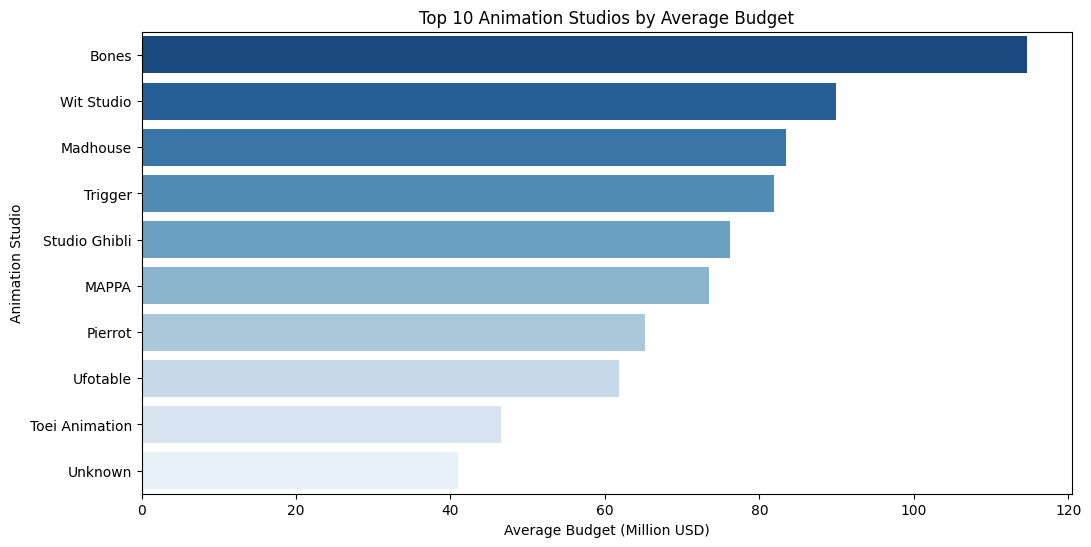

In [9]:
# 2️⃣ 计算每个动画工作室的平均预算
studio_budget = df_cleaned.groupby("Animation Studio Name")["Budget (in Million USD)"].mean().dropna().sort_values(ascending=False)
top_10_studios = studio_budget.head(10)

# 绘制条形图
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_studios.values, y=top_10_studios.index, hue=top_10_studios.index, palette="Blues_r", legend=False)
plt.title("Top 10 Animation Studios by Average Budget")
plt.xlabel("Average Budget (Million USD)")
plt.ylabel("Animation Studio")
plt.show()

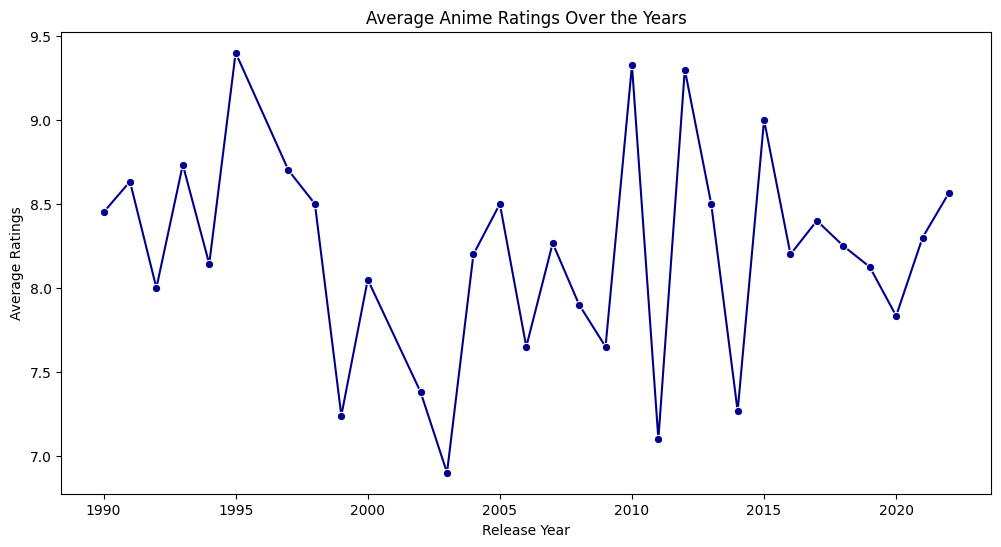

In [10]:
# 3️⃣ 计算每年的平均评分
yearly_ratings = df_cleaned.groupby("Release Year")["Ratings"].mean().dropna()

# 绘制折线图
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values, marker="o", color="darkblue")
plt.title("Average Anime Ratings Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Ratings")
plt.show()

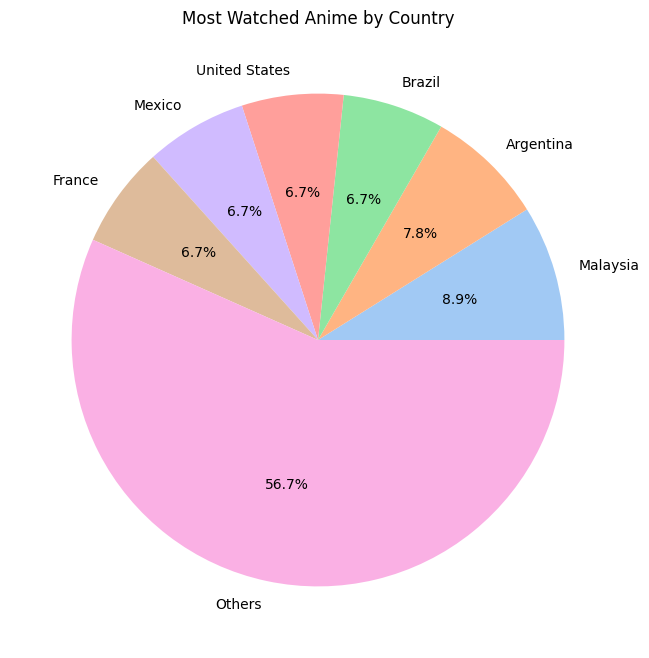

In [11]:
# 4️⃣ 统计各国最受欢迎动画的数量
country_counts = df_cleaned["Most Watched in Country"].value_counts().drop("Unknown", errors="ignore")
top_countries = country_counts.head(6)
top_countries["Others"] = country_counts[6:].sum()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Most Watched Anime by Country")
plt.show()